In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
from konlpy.tag import *

m = Mecab(dicpath = 'C:/mecab/mecab-ko-dic')

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
data = pd.read_csv('C:/Users/songy/Desktop/Data/sentiment_data/pad_reivew_pp.csv', index_col = 0)

In [4]:
# tokenized_sentence의 결과가 NaN으로 책정되는 case 발생 > 결과값 불러올 떄 발생?????? 왜?
data[data['tokenized_sentence'].isna()]

# 원문 있을 경우 tokenized_sentence 반영 
data['tokenized_sentence'] = data.apply(lambda x: x['content_lst'] if pd.isna(x['tokenized_sentence']) else x['tokenized_sentence'], axis=1)

# 원문, 토큰화된 문장 NaN일 경우 삭제
data.dropna(inplace=True)

In [5]:
def replace_text(text):
  text = str(text)
  text = text.replace('좋아용', '좋아요')
  text = text.replace('굿국국숙','굿')
  text = text.replace('goood','굿')
  text = text.replace('꿋꿋입니다','굿')
  text = text.replace('굿입디다','굿')
  text = text.replace('굿입니다','굿')
  text = text.replace('bbb','굿')
  text = text.replace('잘 되네요', '잘되다')
  text = text.replace('잘 작동됩니다', '잘되다')
  text = text.replace('잘 됩니다', '잘되다')
  text = text.replace('강추합니다', '강추입니다')
  text = text.replace('이거만 한', '이만한')
  text = text.replace('마음에 듭니다', '마음에들어요')
  text = text.replace('이뿌요', '이뻐요')
  text = text.replace('잘 되', '잘되어')
  text = text.replace('잘되네요', '잘되어요')
  text = text.replace('잘 되네요', '잘되어요')
  text = text.replace('힘듭니다', '힘들어요')
  text = text.replace('맘에', '마음에')
  text = text.replace('저령','저렴')
  return text
data['content_lst'] = data['content_lst'].apply(replace_text)

In [6]:
#data.drop(columns='Unnamed: 0', inplace=True)

In [7]:
general = data[data['review_type'] == 'general']

In [8]:
def compiled_morphs_total(texts, stopwords_path, additional_stopwords=[]):
    # 불용어 파일 로드
    with open(stopwords_path, encoding='utf-8') as file:
        stopwords = file.read().splitlines()
    
    # 추가 불용어 합치기
    stopwords.extend(additional_stopwords)
    
    # 리뷰 전처리
    clean = re.sub(r'[-=+,#/\?:^$.@*"※~&%ㆍ!』\\‘·|\(\)\[\]\<\>`\'…\"\“’]', '', texts)
    clean = clean.replace('\n', '').replace('\r', '')  # 줄바꿈 문자 제거
    
    # 형태소 분석기
    # m = Mecab(dicpath='C:/mecab/mecab-ko-dic')  # Mecab 경로 설정 (Windows 환경에서 사용)
    okt = Okt()

    # 형태소 추출 시 어간으로 추출
    tokens = okt.morphs(clean, stem = True)
    tokens = [word for word in tokens if word not in stopwords]
    
    return tokens

In [9]:
def str_to_list(text):
    if isinstance(text, str):
        try:
            return eval(text)
        except:
            return text
    return text

general['tokenized_sentence'] = general['tokenized_sentence'].apply(str_to_list)

In [10]:
# 토큰화된 문장이 아예 NaN값이 있어서 해당 부분만 변경

#general.at[5276, 'tokenized_sentence'] == '너무 좋아요 배송도 빠르고'
#general.at[6143, 'tokenized_sentence'] == '사이즈 딱입니다 배송도 빠르고'

In [11]:
# texts = product['add_rule_based_split_review']  # 리뷰 데이터
stopwords_path = "C:/Users/songy/Desktop/Data/stopwords-ko.txt"
additional_stopwords = ['가', '가격', '가운데', '가족', '간', '감', '감비', '값', '같고', '같습니다', '같아', '같아서', '같아요', '겉',
                        '같은', '결제', '같은데', '개', '거', '거랑', '검색', '것', '겉', '게', '게요', '결과', '결재', '경우', '고', '금액', '차이',
                        '고려', '고만', '고민', '곳', '과', '구리고', '구매', '구매평', '구비', '구성', '구입', '군더더기',
                        '글', '급하게', '기대', '기존', '기준', '길', '김기', '깊질', '까지', '끝', '나라', '나중', '날', '남편',
                        '냐짱', '너무', '네이버', '노브', '눈', '느낌','는', '다', '다르게', '다르고', '다양', '다이소', '달',
                        '담', '답변', '대부분', '대비', '대신', '덕분', '덜렁', '도', '도착', '돈', '동봉', '동생', '동일', '돼다', '되다',
                        '되어다', '두면', '뒤', '들', '등', '디', '딸', '때', '땡', '라', '라고', '래빗', '레이', '로',
                        '를', '리뷰', '마', '마련', '마음', '만', '만족', '많고', '많아서', '많았었', '많지만', '말', '맘', '맛', '멀티',
                        '멜리', '면', '못', '무료', '문', '문제', '물', '물건', '미', '및', '밑', '며칠', '바이', '박스', '반', '받다',
                        '발', '발송', '배', '배송', '번', '번개', '벽', '변', '별도', '별점', '보관', '복', '봉', '부분', '브레',
                        '비선', '빌', '사나', '사서', '사실', '사요', '사용', '사장', '사진', '생각', '서', '선물', '선택',
                        '설치', '세상', '쇼퍼', '숍', '수', '숙소', '스타', '스티커', '스펙', '시', '시기', '시대', '시험', '신랑',
                        '신행', '실사', '실사용자', '싸게', '싸는데', '싸진', '쌀', '써다', '쏙', '쓸모', '아들', '아무것',
                        '아주', '아직', '안', '않다', '알차게', '앞', '애', '야지', '얇아요', '얘기', '어머니', '언니', '언스', '엄마', '에', '에서', '엔', '엔코',
                        '여분', '여유', '역할', '연락', '연휴', '옆', '예비', '예전', '옛날', '오다', '오랫동안', '오전', '오케이', '오후',
                        '와', '와이프', '요', '요새', '요즘', '용', '운', '워홀', '원', '원래', '으로', '은', '을', '의',
                        '이', '이거', '이다', '이라', '이랑', '이번', '이외', '이용', '이유', '이전', '인', '인터넷', '일행', '있고', '있군요',
                        '있긴', '있네요', '있는', '있는대도', '있다', '있다는', '있던데', '있어', '있어서', '있었', '있을', '있지만', '자', '자다', '자체',
                        '잔', '잘', '장만', '잦은데', '저번', '전', '전용', '전이', '전체', '점', '정', '정도', '제', '제공',
                        '제품', '종결', '종류', '주',
                        '주니', '주문', '주파', '준비', '지난번', '지네', '지원', '지인', '집', '차', '차지', '처리', '처음', '첨부',
                        '추후', '출국', '출장', '친구', '커피', '코', '크게', '크지','테스트', '퇴원', '튀', '트',
                        '티', '판매', '평', '평생', '포장', '포함', '표', '프리', '필', '하고', '이거',
                        '하다', '하머', '하우스', '한', '한국', '한큐', '해', '형', '호텔', '확인', '활용', '회사', '효', '후', '후기', '같', '없', '목', '높은',
                        '흠', '히', '힘', '하루', '있', '가능', '음',  '단', '역시', '해외', '여행', '어댑터',
                        '배변', '패드', '요요', '성비', '위', '질', '이것저것', '막', '재재', '아조', '보통', '평소', '이후', '정기', '울', '량', '단골', '계속', '포', '여기저기',
                        '이틀', '지금','뒷면', '참고', '푸', '첨', '다둥', '갑', '패', '한동안', '완전', 'ㄴ', '조', '숯', '킹스',
                        '멍멍이', '향도', '가성', '앞뒤', '사이', '방', '코코', '이름', '최근', '딘', 'ㄱ', '짜리', '비', '급', '드', '중', '한쪽', '쥐', '작년', '룸', '송', '사면',
                        '견이', '남자', '불가', '갈기', '말티', '제일', '속', '솜', '별', '미만', '고요', '요귀', 'ㄷ', '선비', '수컷', '초대', 'ㅣ', '쏘', '럭', '오늘', '오랜만',
                        '아지', '무리', '낮', '인생', '기', '껍지', '최소', '중대', '옹', '여자', '탓', 'ㅂ', '귀퉁이', '스피츠', '덕', '조타', '국민', '남', '톱', '품', '독',
                        '왼쪽', '오른쪽', '강', '만점', '진작', '내용', '깔', '플로', '근처', '임', '초코', '조음', '세로', '성', '사도', '묘', '댁', '미세', '쇼핑', '전화', '탑',
                        '답', '상세', '빅', '후원', '바깥', '프렌치', '덩', '여아', '치', '지', '대', '쟁', '펠', '렛', '갱', '제격', '역', '둥이', '절', '실', '습수', '멈', '겨',
                        '가설비', '족', '적', '신문지', '회용', '믹', '페스', '워', '이대로', '반년', '응아', '밧', '현상', '방법', '홈', '숩', '반복', '도통', '이코노미', '새요',
                        '셉', '인향', '중자', '최', '수력', '액', '시중', '뒤처리', '바도', '콩', '짐', '장당', 'ㅁ', '평균', '이동', '구요', '말모', '사니', '여러', '유',
                        '중임', '아진', '장모', '매합', '완료', '한참', '해당', '감안', '명', '역대', '찜', '믈', '통', '몽이', '향상', '샙', '꼬미', '밤중', '포미',
                        '뎅이', '여요', '고생', '문자', '반나절', '대용', '녀', '요조', '아요', '반경', '팬', '쉬만', '시도', '렴', '생가', '감도', '우', '자요', '암', '후론',
                        '루루', '은근', '좃', '띠', '저령', '뉴', '항사', '귀양', '붐', '펄프', '노모', '이쪽저쪽', '세장', '뮨', '규', '꼴', '파드', '니노', '괴안', '슈', '우타다',
                        '주세', '시야', '희', '뚱', '씨', '잴', '실례', '앒', '와중', '끝판', '추', '견지', '요배', '낫', '동', '에다', '조앙', '스탠', '세지', '연', '니더', '바', '닽',
                        '양이', '글쎄', '사본', '단독', '쓰봉', '친정집', '김', '치와', '슈거', '느', '토이', '특이', '방치', '군', '욕', '루피', '지에', '흘', '부', '견응', '살짝', '개아들',
                        '텨', '듄', '이하', '앝', '아용', '주말', '턱', '다뇨', '알', '상', '넝', '쪼끔', '야기', '직', '붕가', '쥬', '외', '서오', '아디', '로뎀', '젖', '덧', '현재', '번창', '작', '항', '불', '적정',
                        '안세', '소자', '시판', '끝단', '어림', '냄', '서요', '위주', '깔개', '업장', '내외', '울대', '주위', '찰스', '버드맨', '칭', '베리', '푹신', '삿', '대응', '논의', '경', '국',
                        '소취', '산', '밤새', '마린', '임도', '개모', '디즈', '팝', '슈퍼', '립니', '특유', '다회', '곳곳', '파', '대소', '쏭', '순식간', '줌', '깜놀', '진심', '동공', '치곤', '후손',
                        '로랑', '형성', '토모', '땅', '약형', '동군', '여기사', '뚜', '룡', '조그', '일쑤', '강주', '척', '겐', '뚜꾸', '하마', '둔갑', '수매', '겡', '해영', '러버', '대로', '습기', '쉽',
                        '루', '고중', '긑', '우니', '낙', '넉', '기니', '화요일', '개딸', '재결', '날강도', '목요일', '월요일', '땜질', '야간', '이해', '판위', '장여', '커크', '랜', '도라', '재근', '호도',
                        '샌', '파파', '외각', '쿠거', '몽중', '양도', '개놈', '가이', '대피', '장실', '고령', '일곡', '감이', '만자문', '적격', '길거리', '덩이', '선방', '키런', '햄', '께랑', '개론', '램', '와이오밍',
                        '완존', '타비', '찰', '잡잡', '요아', '나오', '어감', '홍시', '두마', '산이', '키우', '쥐똥', '달견', '부들', '부실', '징', '둡', '밀리지', '구람', '어치', '큰딸', '초아',
                        '텐', '저당', '쉼', '휠', '견반', '거려', '제로', '예견', '역쉬', '항인', '별전', '유어', '듀야', '유야', '유라', '오야', '엉', '쟁기', '밸', '용허', '죠', '누질', '잇', '정에', '간혼',
                        '조조', '오조', '지정', '장호', '굽', '보타', '우고', '보꾹', '시키', '수놈', '곁', '양정', '불량아', '소홀', '우거', '꽁', '숫', '닼', '난사', '욤', '수개월', '롱이', '성경', '임료', '요구',
                        '줄장', '쓰래', '대몽', '잭', '사항', '거유', '계족', '둠', '과찬', '아서', '편이', '벌', '당사', '개더', '애요', '번차', '납', '라주', '솧', '일회', '테', '바야', '엠', '다도', '요개', '봄', '가을',
                        '애장', '고고씽', '버', '비로', '대기', '그럭', '땡땡이', '강선', '스키', '버논', '비가', '거짓', '대요', '호오', '저초', '야호', '비축', '진전', '진리', '긴말', '미고', '두아', '타우', '왕따', '꺼만',
                        '두기', '항거', '짤짤이', '삽', '돌아악', '영역', '보름', '도중', '私', '房', '菜', '美', '아즈', '셀리', '옌', '버리', '휴지통', '매년', '안방', '쓰개', '깡깡이', '미미', '이리리', '비비',
                        '디디', '션', '노드', '몽', '홀', '점입', '콜', '자우', '어래', '누나야', '룬', '어류', '차선', '토리', '금대', '리치', '니즈', '절지', '개로신', '미안', '레트', '수별', '번갈',
                        '드로', '가스', '가송', '비갑', '유니참', '계', '안성', '긔', '애고', '강순', '시예', '시위', '중화', '문가', '거어', '려', '함', '익만', '승수', '두품', '극', '시쟁', '기격구', '담날',
                        '유랑', '가계', '거보', '먹', '우씨', '시바', '요일', '중닭', '시골집', '방생', '모카', '거미', '떨기', '해유', '뱃', '샅', '아누', '아영', '턴', '몰리', '스', '농수', '산집', '이란', '세보', '하소연', '제구',
                        '보대', '세뇨', '도꾸', '소모량', '빈', '예시', '동급', '참조', '변환', '졸리', '래브라도', '싱', '물가고', '녕', '가드', '짝', '사여', '소성', '거도', '사유', '상기', '지라', '담부', '대건', '미흡', '샵',
                        '저주', '폭탄', '살', '용굿', '검', '저어', '않', '이상일', '깜장', '피', '광증', '조코', '안뜸', '마나', '골', '까치', '셔', '애덕', '바이바이', '돗돔', '여타', '휘', '금새', '곡', '잎', '이즈라', '조기', '이길만',
                        '범', '야옹이', '비론', '톰', '제때', '똘', '도툼', '조야', '촉', '매기', '종전', '가량', '이대', '판티', '갗', '시량', '당량', '시미', '움', '소용', '톡', '용양', '약시', '병', '두깨', '재문', '서두', '피츠', '필도', '방기',
                        '사수', '불리', '자신감', '뒤편', '쌍', '이재', '막지', '따님', '규조토', '티즈', '보', '농', '계임', '난중', '러그', '밝은색', '로럴', '젤', '하항', '상쓰', '궁', '향이', '아드', '대왕', '소영', '선정', '소지', '종가',
                        '기원', '오래간만', '특수', '개춘', '기라', '보동', '앞쪽', '깃', '표정', '샆', '재탕', '증발', '정성', '론', '갱지', '네요', '라다', '얄','염용', '뜸', '자류', '가디', '견분', '발도', '장꽝', '샤', '비위', '의견',
                        '리', '주무', '시바이', '액셀', '곡산', '종로', '봉사', '숳', '구예', '요령', '즈', '몰기', '보거', '래', '한물', '에소', '망사', '의촉', '공함', '뉴뉴', '패두', '쥴', '애벌빨래', '애용품', '전거', '반련', '견제', '시일',
                        '수록', '페트', '츠', '아가야', '재그', '도치', '양견', '서리', '버디', '쿠싱', '맘마', '베베', '페페', '공', '출근길', '잠', '개당', '하주', '개도', '배번', '시퍼', '사세', '변태', '직사각', '사열', '건승', '이력', '교',
                        '승부', '복고', '입소', '모랑', '바요', '탐', '광', '낌', '타가', '문턱', '태무', '무시', '모자람', '문란', '경양', '여럿', '기판', '대서', '광색', '말캉', '아간', '이먼', '개의', '이강', '오공', '귀염둥이',
                        '지독', '변양', '존망', '그간', '모도', '셀', '소라지', '아버님', '죄', '매달', '민공', '어멈', '부스럼', '최저', '본지', '갑오', '브', '재자', '페트로', '끈끈이', '백패', '그제', '모에', '수문', '마은', '가섭', '큐',
                        '엇청', '피피', '군요', '본론', '로러', '오노', '이이', '뚱뚱이', '뚝', '몬스터', '곰팡', '와부', '확연', '퍼스트', '세미', '리라', '평일', '모레나', '라이', '력', '벗', '용용', '개재', '북송', '개코', '두던', '하루치',
                        '볕', '재거', '지난달', '색이', '로지', '줄', '화', '저반', '자마', '대오', '리프', '견초', '보디', '테일', '겹', '세', '려고', '버니', '데이', '대다수', '세어', '하번', '교하', '긁', '롬', '반낭',
                        '범벅', '자죽', '자선', '무조', '정직', '배변패드', '청소기', '무선', '마스크팩', '메디', '힐', '마스크', '팩',
                        '입', '존', '테스', '반품', '택배', '사둔', '수어', '천도', '물놀', '제기', '편', '녹', '어머님', '쑥국', '시어머니', '오크', '밀', '룰루', '룰', '엘레', '딩', '딸내미', '장',  '깡', '컷', '적리', '네영', '이모', '당',
                        '입진', '통도', '워너', '비즈', '틱', '머서', '주수', '입어', '교환',
                        '여깁니다', '밤사이','텐데요','나머진', '이걸로','김성윤','가규','리쥬','처','전반','리더스더마픽스','더블유','베토벤','엄청','잔느식스헬로케어팩','액비','이모','아저씨','아비브','덩어리','자음생','조리원','기분전환','사보','메르비',
                        '사시','인감','특정','눈앞','아들딸','중반','아리디','딸애','눈두덩','편','탈','거짓말','순수크린','직전','생김','협찬','닥터웰메이드','서우콜라겐','히터','서우','골드핏마스크','선호','유학길','목표','자취','게으름뱅이','야대',
                        '점도','선두','리머','올해','미래','능','일향','일대','뭉텅이','한상','업무상','대면','취업','계획','무지한','불혹','면에','자용','부부','엡','핍','겇','올케언니','별말','남학생','무공','서함','들통','로로스키니','다회차','내용품',
                        '봄여름','슥','자부','원위치','수정','님','셀카','핑','디엠','해선','용재','확대','사모','조아지','경찹','서랍','살점','발해','런지','테앵','잇기','페리홉','친언니','연습','하녀','코이','코나','한나절','마리오네트','무척','그럽','요즈음',
                        '예랑','심부','낼','소꿉친구','미련','헤거','예인','알가','메트','리콜','케비아','에르메스','실감','약감','활','사바','과도','태한','부지','프로셀','쐐','아오','쯤','맡','렁','후애','자면','아크','짜도','우와','둥','당연','놀','시댁',
                        '피몽','쉐','시어머니','실현','앞전','미남','데카','소사','이드','앙몽','듸','삭','개안','소테','쪼금','기어','개개','골짝','피프','피코','허신','취소','센타','밈','감고','샤프','이만저만','항구','이브','가금','착면','우태',
                        '덕선','선라','사합','키','튜','하나하나','직접','파티션','챙','거가','러플','접이','탕요','바케','바흐','파하','앆','구매','착시','넉지','율','알뜰','건몰','태산','지사장','임박','적지','주차','바림','지와','바보','다라',
                        '서진','스콜라','나만','식','연애','유정','재현','마이드','아기씨','재구','매입','비부','긷','야근','틈','헬로','고행','쟌느','가농','발처','인심','토털','게유','들보','비티','카구','숭','힌','타애','애너','우아','누우','투타','숙부',
                        '쟁두','무네','이상무','효가','방판','최신','최초','의지','확','악','절반','러너','다로','찬','헵','고영','순']

# 문자열 여부를 체크하고, None 또는 다른 타입의 값이 있을 경우 빈 문자열로 처리
# general['morphs'] = general['tokenized_sentence'].apply(lambda texts: compiled_morphs(str(texts), stopwords_path, additional_stopwords) if isinstance(texts, str) else [])
# general['morphs_2'] = general['tokenized_sentence'].apply(lambda texts: compiled_morphs_total(str(texts), stopwords_path, additional_stopwords) if isinstance(texts, str) else [])
general['morphs'] = general['tokenized_sentence'].apply(lambda texts: compiled_morphs_total(str(texts), stopwords_path, additional_stopwords) if isinstance(texts, str) else [])

In [12]:
def list_convert_comma(lst):
    return ', '.join(lst)

def list_convert_space(lst):
    return ''.join(lst)

In [13]:
# general['Tokenized_morphs_list'] = general['morphs'].apply(list_convert_comma)
# general['Tokenized_morphs'] = general['Tokenized_morphs_list'].apply(list_convert_space)
# general.head(3)

general['Tokenized_morphs_list'] = general['morphs'].apply(list_convert_comma)
general.head(3)

,brand_name,product_name,write_dt_lst,rating_lst,content_lst,len,repeated_final,review_type,tokenized_sentence,detail_review_type,morphs,Tokenized_morphs_list
0,리본글로벌,큰패드 절약형 대형 50g x 160매 박스 정직한 애견 강아지 배변패드 반려견,20240802,5,강아지 2마리와 살다 보니 배변패드가 많이 필요하네요 배변 흔적은 바로바로 치우기 ...,70,0,general,강아지 2마리와 살다 보니 배변패드가 많이 필요하네요,service,"[강아지, 2, 살다, 보다, 많이, 필요하다]","강아지, 2, 살다, 보다, 많이, 필요하다"
0,리본글로벌,큰패드 절약형 대형 50g x 160매 박스 정직한 애견 강아지 배변패드 반려견,20240802,5,강아지 2마리와 살다 보니 배변패드가 많이 필요하네요 배변 흔적은 바로바로 치우기 ...,70,0,general,배변 흔적은 바로바로 치우기 때문에 절약형 패드가 정말 많이 도움 됩니다,service,"[바로바로, 치우다, 때문, 절약, 정말, 많이, 도움]","바로바로, 치우다, 때문, 절약, 정말, 많이, 도움"
1,리본글로벌,큰패드 절약형 대형 50g x 160매 박스 정직한 애견 강아지 배변패드 반려견,20240802,5,항상 쓰던 거예요 가성비 좋고 배송도 빠르고 짱,26,0,general,항상 쓰던 거예요,service,"[항상, 쓰다, 예요]","항상, 쓰다, 예요"


In [14]:
sentiword_dic = pd.read_csv("C:/Users/songy/Desktop/Data/sentiment_data/KNU_dictionary/sentiment_dictionary.csv", index_col = 0)
sentiword_dic

,word,word_root,polarity
0,(-;,(,1
1,(;_;),(;_;),-1
2,(^^),(^^),1
3,(^-^),(^-^),1
4,(^^*,(,1
...,...,...,...
14880,쩐다,쩐다,2
14881,신통방통,신통방통,1
14882,유의하다,유의하다,-1
14883,무용지물,무용지물,-2


In [15]:
def m_sentiment_score(morphs):
    p_v=[]
    for morph in morphs:
        match = sentiword_dic[(sentiword_dic['word']==morph)]
        if not match.empty:
            p_v.append(match['polarity'].values[0])
    return sum(p_v)

def return_morph_in_dict(morphs):
    p_m = []
    for morph in morphs:
        match = sentiword_dic[(sentiword_dic['word']==morph)]
        if not match.empty:
            p_m.append(match['word'].values[0])
    return p_m

In [16]:
general['match_dic'] = general['morphs'].apply(return_morph_in_dict)
general['polarity'] = general['morphs'].apply(m_sentiment_score)

In [17]:
general.head(3)

,brand_name,product_name,write_dt_lst,rating_lst,content_lst,len,repeated_final,review_type,tokenized_sentence,detail_review_type,morphs,Tokenized_morphs_list,match_dic,polarity
0,리본글로벌,큰패드 절약형 대형 50g x 160매 박스 정직한 애견 강아지 배변패드 반려견,20240802,5,강아지 2마리와 살다 보니 배변패드가 많이 필요하네요 배변 흔적은 바로바로 치우기 ...,70,0,general,강아지 2마리와 살다 보니 배변패드가 많이 필요하네요,service,"[강아지, 2, 살다, 보다, 많이, 필요하다]","강아지, 2, 살다, 보다, 많이, 필요하다",[],0
0,리본글로벌,큰패드 절약형 대형 50g x 160매 박스 정직한 애견 강아지 배변패드 반려견,20240802,5,강아지 2마리와 살다 보니 배변패드가 많이 필요하네요 배변 흔적은 바로바로 치우기 ...,70,0,general,배변 흔적은 바로바로 치우기 때문에 절약형 패드가 정말 많이 도움 됩니다,service,"[바로바로, 치우다, 때문, 절약, 정말, 많이, 도움]","바로바로, 치우다, 때문, 절약, 정말, 많이, 도움",[도움],1
1,리본글로벌,큰패드 절약형 대형 50g x 160매 박스 정직한 애견 강아지 배변패드 반려견,20240802,5,항상 쓰던 거예요 가성비 좋고 배송도 빠르고 짱,26,0,general,항상 쓰던 거예요,service,"[항상, 쓰다, 예요]","항상, 쓰다, 예요",[],0


In [18]:
general.to_csv('C:/Users/songy/Desktop/Data/sentiment_data/refined/pad_polarity.csv', encoding='utf-8-sig')

In [19]:
round((general.polarity.value_counts(normalize=True)*100),2).to_frame().reset_index().sort_values(by='polarity', ascending=False).style.background_gradient(axis=None, cmap= sns.light_palette("#2ecc71", as_cmap=True))

,polarity,proportion
17,21,0.000000
18,12,0.000000
16,10,0.010000
15,9,0.010000
12,8,0.060000
11,7,0.080000
8,6,0.560000
7,5,1.100000
4,4,5.570000
3,3,6.270000


In [20]:
print(round(general.polarity.mean(),2))
print(general.polarity.median())

1.26
1.0


### 평점 수정 로직

In [21]:
general = pd.read_csv('C:/Users/songy/Desktop/Data/sentiment_data/refined/pad_polarity.csv', index_col=0)

In [22]:
general.head(3)

,brand_name,product_name,write_dt_lst,rating_lst,content_lst,len,repeated_final,review_type,tokenized_sentence,detail_review_type,morphs,Tokenized_morphs_list,match_dic,polarity
0,리본글로벌,큰패드 절약형 대형 50g x 160매 박스 정직한 애견 강아지 배변패드 반려견,20240802,5,강아지 2마리와 살다 보니 배변패드가 많이 필요하네요 배변 흔적은 바로바로 치우기 ...,70,0,general,강아지 2마리와 살다 보니 배변패드가 많이 필요하네요,service,"['강아지', '2', '살다', '보다', '많이', '필요하다']","강아지, 2, 살다, 보다, 많이, 필요하다",[],0
0,리본글로벌,큰패드 절약형 대형 50g x 160매 박스 정직한 애견 강아지 배변패드 반려견,20240802,5,강아지 2마리와 살다 보니 배변패드가 많이 필요하네요 배변 흔적은 바로바로 치우기 ...,70,0,general,배변 흔적은 바로바로 치우기 때문에 절약형 패드가 정말 많이 도움 됩니다,service,"['바로바로', '치우다', '때문', '절약', '정말', '많이', '도움']","바로바로, 치우다, 때문, 절약, 정말, 많이, 도움",['도움'],1
1,리본글로벌,큰패드 절약형 대형 50g x 160매 박스 정직한 애견 강아지 배변패드 반려견,20240802,5,항상 쓰던 거예요 가성비 좋고 배송도 빠르고 짱,26,0,general,항상 쓰던 거예요,service,"['항상', '쓰다', '예요']","항상, 쓰다, 예요",[],0


In [23]:
# 원문에서 빼기 대상 (-1점)
subtract_one_lst = ['제대로','뽁뽁이도 없이','쿠션은 없고','스티커도 없고']

# 원문에서 빼기 대상 (-2점)
subtract_lst = ['좋겠어요','가능할 것 같은데','좋으면','사용하지 말라고','과부하','안돼가지고 못썼네요','안 들어가는 부분',
                '저렴하지는 않네요','무거워서']

# 원문에서 빼기 대상 (-3점)
subtract_three_lst = ['타는 냄새']

# 원문에서 추가 대상 (+5점)
add_five_lst = ['번거로움을 덜어줄 뿐 아니라']

# 원문에서 추가 대상 (+3점)
add_three_lst = ['불량이 없길','구매하시고','진작 구매']

# 원문에서 추가 대상 (+2점)
add_lst = ['특이점 없고','문제없으며','고장 없었고','아니니까','걱정할 필요 없','어슬픈','잘 작동','잘 사용',
           '마음에 들어요','이상없이','왕창 사서','고장 없었고','과감하게 사용','꼭 구매','잘 쓰고',
           '잘 썼어요','걱정할 필요 없어요','여러 기능','굿','잘 됩니다','맘에 드네요','덕분에',
           '맞는 파우치','군더더기 없고']

# 원문에서 추가 대상 (+1점)
add_one_lst = ['잃어버려서','다이소에는 없길래','급하게','불량 없었으면 좋겠어요','그리워서','많네요','급히',
               '사용을 해볼 수 없지만','이상 없을 거라','잘 구매','잘 왔네요','총알 배송','어디든 사용','문제 없이']

In [24]:
def adjust_polarity(datas, word_lst, n):
    """
    1) datas : rows
    2) word_lst : 룰 적용 리스트
    3) n : 더하거나 뺄 값
    """
    if isinstance(datas['tokenized_sentence'],str):
        if any(word in datas['tokenized_sentence'] for word in word_lst):
            datas['polarity'] += n
    return datas

In [25]:
general = general.apply(adjust_polarity, word_lst=subtract_one_lst, n=-1, axis=1)   # 행 단위로 실행
general = general.apply(adjust_polarity, word_lst=subtract_lst, n=-2, axis=1)
general = general.apply(adjust_polarity, word_lst=subtract_three_lst, n=-3, axis=1)
general = general.apply(adjust_polarity, word_lst=add_five_lst, n=5, axis=1)
general = general.apply(adjust_polarity, word_lst=add_three_lst, n=3, axis=1)
general = general.apply(adjust_polarity, word_lst=add_lst, n=2, axis=1)
general = general.apply(adjust_polarity, word_lst=add_one_lst, n=1, axis=1)
general.head(3)

,brand_name,product_name,write_dt_lst,rating_lst,content_lst,len,repeated_final,review_type,tokenized_sentence,detail_review_type,morphs,Tokenized_morphs_list,match_dic,polarity
0,리본글로벌,큰패드 절약형 대형 50g x 160매 박스 정직한 애견 강아지 배변패드 반려견,20240802,5,강아지 2마리와 살다 보니 배변패드가 많이 필요하네요 배변 흔적은 바로바로 치우기 ...,70,0,general,강아지 2마리와 살다 보니 배변패드가 많이 필요하네요,service,"['강아지', '2', '살다', '보다', '많이', '필요하다']","강아지, 2, 살다, 보다, 많이, 필요하다",[],0
0,리본글로벌,큰패드 절약형 대형 50g x 160매 박스 정직한 애견 강아지 배변패드 반려견,20240802,5,강아지 2마리와 살다 보니 배변패드가 많이 필요하네요 배변 흔적은 바로바로 치우기 ...,70,0,general,배변 흔적은 바로바로 치우기 때문에 절약형 패드가 정말 많이 도움 됩니다,service,"['바로바로', '치우다', '때문', '절약', '정말', '많이', '도움']","바로바로, 치우다, 때문, 절약, 정말, 많이, 도움",['도움'],1
1,리본글로벌,큰패드 절약형 대형 50g x 160매 박스 정직한 애견 강아지 배변패드 반려견,20240802,5,항상 쓰던 거예요 가성비 좋고 배송도 빠르고 짱,26,0,general,항상 쓰던 거예요,service,"['항상', '쓰다', '예요']","항상, 쓰다, 예요",[],0


In [26]:
general.to_csv('C:/Users/songy/Desktop/Data/sentiment_data/refined/pad_modified_score.csv', encoding='utf-8-sig')

사전 추가 대상 반영하기

In [27]:
# konlpy 설치 경로 확인
import konlpy
print(konlpy.__file__)

c:\Users\songy\anaconda\envs\mecab\lib\site-packages\konlpy\__init__.py


konlpy> java > open-korean-text-2.1.0.jar > 압축 해제 > 삭제하고 okt 사전 추가 > java로 압축하는 거 찾아서 반영
- jar 압축 : https://convertio.co/kr/zip-jar/ 
- 경로:  C:\Users\songy\anaconda\envs\mecab\Lib\site-packages\konlpy\java\open-korean-text-2.1.0\org\openkoreantext\processor\util

In [28]:
#### 아래 sentiment_dictionary.csv에 반영

# 비추 (-2)
# 굿 (2)
# 과부하 (-2)
# 만족 (2)
# 허술 (-2)
# 무거워서 (-2)
# ㅠㅠ (-2)
# 눈물 (-1)
# 추천 (2)
# 뻑뻑하긴 (-1)
# 무게감 (-2)
# 실용성 (2)
# 깔쌈 (2)
# 기대 (2)
# 만능 (2)
# 효율 (2)
# 강추 (3)

### Sentiment Score Apply

In [29]:
def apply_sentiment(polarity):
    if polarity > 0 :
        return 1
    elif polarity == 0:
        return 0
    elif polarity <0 :
        return -1

In [30]:
general['sentiment'] = general['polarity'].apply(apply_sentiment)
general.head(3)

,brand_name,product_name,write_dt_lst,rating_lst,content_lst,len,repeated_final,review_type,tokenized_sentence,detail_review_type,morphs,Tokenized_morphs_list,match_dic,polarity,sentiment
0,리본글로벌,큰패드 절약형 대형 50g x 160매 박스 정직한 애견 강아지 배변패드 반려견,20240802,5,강아지 2마리와 살다 보니 배변패드가 많이 필요하네요 배변 흔적은 바로바로 치우기 ...,70,0,general,강아지 2마리와 살다 보니 배변패드가 많이 필요하네요,service,"['강아지', '2', '살다', '보다', '많이', '필요하다']","강아지, 2, 살다, 보다, 많이, 필요하다",[],0,0
0,리본글로벌,큰패드 절약형 대형 50g x 160매 박스 정직한 애견 강아지 배변패드 반려견,20240802,5,강아지 2마리와 살다 보니 배변패드가 많이 필요하네요 배변 흔적은 바로바로 치우기 ...,70,0,general,배변 흔적은 바로바로 치우기 때문에 절약형 패드가 정말 많이 도움 됩니다,service,"['바로바로', '치우다', '때문', '절약', '정말', '많이', '도움']","바로바로, 치우다, 때문, 절약, 정말, 많이, 도움",['도움'],1,1
1,리본글로벌,큰패드 절약형 대형 50g x 160매 박스 정직한 애견 강아지 배변패드 반려견,20240802,5,항상 쓰던 거예요 가성비 좋고 배송도 빠르고 짱,26,0,general,항상 쓰던 거예요,service,"['항상', '쓰다', '예요']","항상, 쓰다, 예요",[],0,0


In [31]:
general.to_csv('C:/Users/songy/Desktop/Data/sentiment_data/refined/pad_modified_score.csv', encoding='utf-8-sig')

In [32]:
round(general.sentiment.value_counts(normalize=True)*100,2).to_frame().reset_index()

,sentiment,proportion
0,1,64.47
1,0,30.46
2,-1,5.07


### 속성값 반영 로직

In [33]:
general.head(3)

,brand_name,product_name,write_dt_lst,rating_lst,content_lst,len,repeated_final,review_type,tokenized_sentence,detail_review_type,morphs,Tokenized_morphs_list,match_dic,polarity,sentiment
0,리본글로벌,큰패드 절약형 대형 50g x 160매 박스 정직한 애견 강아지 배변패드 반려견,20240802,5,강아지 2마리와 살다 보니 배변패드가 많이 필요하네요 배변 흔적은 바로바로 치우기 ...,70,0,general,강아지 2마리와 살다 보니 배변패드가 많이 필요하네요,service,"['강아지', '2', '살다', '보다', '많이', '필요하다']","강아지, 2, 살다, 보다, 많이, 필요하다",[],0,0
0,리본글로벌,큰패드 절약형 대형 50g x 160매 박스 정직한 애견 강아지 배변패드 반려견,20240802,5,강아지 2마리와 살다 보니 배변패드가 많이 필요하네요 배변 흔적은 바로바로 치우기 ...,70,0,general,배변 흔적은 바로바로 치우기 때문에 절약형 패드가 정말 많이 도움 됩니다,service,"['바로바로', '치우다', '때문', '절약', '정말', '많이', '도움']","바로바로, 치우다, 때문, 절약, 정말, 많이, 도움",['도움'],1,1
1,리본글로벌,큰패드 절약형 대형 50g x 160매 박스 정직한 애견 강아지 배변패드 반려견,20240802,5,항상 쓰던 거예요 가성비 좋고 배송도 빠르고 짱,26,0,general,항상 쓰던 거예요,service,"['항상', '쓰다', '예요']","항상, 쓰다, 예요",[],0,0


In [34]:
# Topic 있는 행만 추출 (나중에 Topic 리스트만 대입 반영 예정)
topic_lst = ['사이즈','흡수력','소변','크기','품질','냄새','소형견','배변패드','두께','아기','대형','소형']

In [35]:
def filtering_review_topic(df, topics):
    mask = df['content_lst'].apply(lambda x: any(topic in x for topic in topics))
    return df[mask]

filtered_df = filtering_review_topic(general, topic_lst)
filtered_df.head()

,brand_name,product_name,write_dt_lst,rating_lst,content_lst,len,repeated_final,review_type,tokenized_sentence,detail_review_type,morphs,Tokenized_morphs_list,match_dic,polarity,sentiment
0,리본글로벌,큰패드 절약형 대형 50g x 160매 박스 정직한 애견 강아지 배변패드 반려견,20240802,5,강아지 2마리와 살다 보니 배변패드가 많이 필요하네요 배변 흔적은 바로바로 치우기 ...,70,0,general,강아지 2마리와 살다 보니 배변패드가 많이 필요하네요,service,"['강아지', '2', '살다', '보다', '많이', '필요하다']","강아지, 2, 살다, 보다, 많이, 필요하다",[],0,0
0,리본글로벌,큰패드 절약형 대형 50g x 160매 박스 정직한 애견 강아지 배변패드 반려견,20240802,5,강아지 2마리와 살다 보니 배변패드가 많이 필요하네요 배변 흔적은 바로바로 치우기 ...,70,0,general,배변 흔적은 바로바로 치우기 때문에 절약형 패드가 정말 많이 도움 됩니다,service,"['바로바로', '치우다', '때문', '절약', '정말', '많이', '도움']","바로바로, 치우다, 때문, 절약, 정말, 많이, 도움",['도움'],1,1
3,리본글로벌,큰패드 절약형 대형 50g x 160매 박스 정직한 애견 강아지 배변패드 반려견,20240802,5,늘 쓰던 패드에요 게 딸이 편하게 쉬야하라고 큰 사이즈로 구매합니다 23번 하면 ...,157,0,general,늘 쓰던 패드에요 게 딸이 편하게 쉬야하라고 큰 사이즈로 구매합니다,service,"['늘', '쓰다', '에요', '편하다', '쉬다', '크다', '사이즈']","늘, 쓰다, 에요, 편하다, 쉬다, 크다, 사이즈","['편하다', '크다']",3,1
3,리본글로벌,큰패드 절약형 대형 50g x 160매 박스 정직한 애견 강아지 배변패드 반려견,20240802,5,늘 쓰던 패드에요 게 딸이 편하게 쉬야하라고 큰 사이즈로 구매합니다 23번 하면 ...,157,0,general,23번 하면 더는 안 해서 가성비 좋고 잘 흡수되는 패드 찾다가 요기 꺼 구매한지 ...,service,"['23', '더', '좋다', '찾다', '요기', '끄다', '한지', '벌써'...","23, 더, 좋다, 찾다, 요기, 끄다, 한지, 벌써, N, 째다",['좋다'],2,1
3,리본글로벌,큰패드 절약형 대형 50g x 160매 박스 정직한 애견 강아지 배변패드 반려견,20240802,5,늘 쓰던 패드에요 게 딸이 편하게 쉬야하라고 큰 사이즈로 구매합니다 23번 하면 ...,157,0,general,다른 플랫폼에서 구매하다가 스마트 스토어는 첫 구매인데요,service,"['플랫폼', '스마트', '스토어', '첫', '인데']","플랫폼, 스마트, 스토어, 첫, 인데",[],0,0


리뷰 합산 점수

In [36]:
#### 전체합이 100이라 생각하고, 합산의 결과 

# 전체 리뷰 개수(전체합) 
total_review_cnt = len(general)
print(f'전체 리뷰 개수 : {total_review_cnt}')

# 전체 리뷰 중 필터링 된 리뷰 개수 (Topic 전체 리뷰)
filtered_review_cnt = len(filtered_df)
print(f'Topic 리뷰 개수 : {filtered_review_cnt}\n')
print('-'*30,'\n')

#### 전체 리뷰 중 sentiment 종합 점수
# 1점이 총 점수이므로 scaling을 5점 맞추기 위해 *5 진행
total_sentiment_score = round((sum(general['sentiment']) / total_review_cnt)*5,1)
print(f'전체 감성 평점 : {total_sentiment_score}')

#### 전체 Topic의 sentiment 종합 점수
topic_sentiment_score = round(sum(filtered_df['sentiment'] / filtered_review_cnt)*5,1)
print(f'Topic들의 감성 평점 : {topic_sentiment_score}')

전체 리뷰 개수 : 48691
Topic 리뷰 개수 : 15291

------------------------------ 

전체 감성 평점 : 3.0
Topic들의 감성 평점 : 2.9


Topic Sentiment 점수

In [37]:
# topic에 대한 sentiment score 결과값 받는 함수 작성
def topic_score(df, topic, k=1):
    ''' 
    # parameters
        df : dataframe contains sentiment score
        topic : topic keyword (단일 키워드, str)
        k : score 표시 소수점 자리 (default=1)
    '''
    topic_sent_df = df[df.tokenized_sentence.notna() & df.tokenized_sentence.str.contains(topic)]   # NA 있지 않고 topic에 대한 행 추출해 결과 처리 진행 
    sent_score = topic_sent_df['sentiment'].sum() / len(topic_sent_df)                              # 전체 대비 sentiment 평점
    sent_normalize = round(sent_score*5,k)                                                          # 5까지로 정규화 
    return sent_normalize    

In [38]:
topic_score(general, topic='패드')

2.2

In [39]:
# 리스트 입력 받으면 리스트에 대한 sentiment 결과값 도출 코드 작성
def list_topic_score(df, topic_list, k=1):
    '''
    리스트 입력시 각 keyword에 대한 sentiment 도출
    '''
    keyword_sent_result = []

    for i in topic_list:
        var_name5 = f'{i}_sent'
        var_name6 = f'{i}_score'
        var_name7 = f'{i}_norm_score'

        #brand_filtered = general[general['brand_name'].contains('스카이트립')]

        globals()[var_name5] = general[general.tokenized_sentence.notna() & general.tokenized_sentence.str.contains(i)]

        if len(globals()[var_name5]) > 0:
            globals()[var_name6] = globals()[var_name5]['sentiment'].sum() / len(globals()[var_name5])
        else:
            globals()[var_name6] = 0
        
        # 5까지로 정규화
        globals()[var_name7] = round(globals()[var_name6]*5,1)
        
        # 결과 리스트에 append
        keyword_sent_result.append({"keyword": i, "sentiment_norm_score": globals()[var_name7]})

    return keyword_sent_result

In [40]:
list_topic_score(filtered_df, 
                 topic_lst, 
                 k=1)

[{'keyword': '사이즈', 'sentiment_norm_score': 3.7},
 {'keyword': '흡수력', 'sentiment_norm_score': 4.1},
 {'keyword': '소변', 'sentiment_norm_score': 2.2},
 {'keyword': '크기', 'sentiment_norm_score': 4.0},
 {'keyword': '품질', 'sentiment_norm_score': 4.2},
 {'keyword': '냄새', 'sentiment_norm_score': 2.3},
 {'keyword': '소형견', 'sentiment_norm_score': 3.1},
 {'keyword': '배변패드', 'sentiment_norm_score': 1.9},
 {'keyword': '두께', 'sentiment_norm_score': 3.2},
 {'keyword': '아기', 'sentiment_norm_score': 1.8},
 {'keyword': '대형', 'sentiment_norm_score': 2.0},
 {'keyword': '소형', 'sentiment_norm_score': 2.7}]

In [41]:
# 고유 브랜드들
brands_unique = list(data['brand_name'].unique())
brands_unique

['리본글로벌',
 '장수원몰',
 '로뎀나무향기',
 '코코아저씨',
 '뽀또펫',
 '백세개로',
 '1등패드 강남패드',
 '올 커머스',
 '맘펫츠',
 '에코펫위드',
 '오담 펫푸드',
 '슈퍼패드',
 '그리팅테일',
 '바둑이',
 '파워도그',
 '펫 포커스',
 '씬바이',
 '베베페페',
 '킹스패드',
 '펫라이프컴퍼니',
 '국민커머스',
 '갓성비 GodsungBy',
 'PET79',
 '런샷',
 '도그제자',
 '블루펫몰',
 '올코',
 '현대홈쇼핑',
 '퍼스트독',
 '개밥의신',
 '몽상회스토어',
 '욜로홀로',
 '플루토 공식몰',
 '루니펫',
 '포아즈',
 '코코뽀숑',
 '코지펫-COZYPET',
 '댕냥이 bowmew',
 '페슬러',
 '유한킴벌리',
 'JSW생활건강']

In [42]:
# 키워드 리스트, 브랜드 입력시 sentiment 결과값 도출 코드 작성
def list_brand_topic_score(df, topic_lst, brands=brands_unique, k=1):

    keyword_sent_result = []
    brands_sent_result = []
    brand_result = []

    for i in topic_lst:
        var_name5 = f'{i}_sent'
        var_name6 = f'{i}_score'
        var_name7 = f'{i}_norm_score'

        # brand로 필터링
        brand_filtered = df[df['brand_name'].str.contains('|'.join(brands))]

        globals()[var_name5] = brand_filtered[brand_filtered.tokenized_sentence.notna() & brand_filtered.tokenized_sentence.str.contains(i)]

        if len(globals()[var_name5]) > 0:
            globals()[var_name6] = globals()[var_name5]['sentiment'].sum() / len(globals()[var_name5])
        else:
            globals()[var_name6] = 0
        
        # 5까지로 정규화
        globals()[var_name7] = round(globals()[var_name6]*5,1)
        
        # 결과 리스트에 append
        keyword_sent_result.append({"keyword": i, "sentiment_norm_score": globals()[var_name7]})

        # 브랜드 결과 리스트에 append
        brands_sent_result.append({"brands": ', '.join(brands), "keyword":i, "sentiment_norm_score": globals()[var_name7]})

        
        #### 브랜드 개별 값도 추가
        for j in brands:
            var_name8 = f'{i}_{j}_brand_sent'
            var_name9 = f'{i}_{j}_brand_score'
            var_name10 = f'{i}_{j}_brand_norm_score'
            var_name11 = f'{j}_brand_df'

            globals()[var_name11] = df[df['brand_name'].str.contains(j)]
            globals()[var_name8] = globals()[var_name11][globals()[var_name11].tokenized_sentence.str.contains(i)]

            if len(globals()[var_name8]) > 0:
                globals()[var_name9] = globals()[var_name8]['sentiment'].sum() / len(globals()[var_name8])
            else:
                globals()[var_name9] = 0
            
            # 5까지로 정규화
            globals()[var_name10] = round(globals()[var_name9]*5,1)

            # 브랜드 결과 리스트에 append
            brand_result.append({"brand": j, "keyword": i, "sentiment_norm_score": globals()[var_name10]})

    total_brands_result_df = pd.DataFrame(brands_sent_result)
    diff_brands_result_df = pd.DataFrame(brand_result) 
    
    return total_brands_result_df, diff_brands_result_df

In [43]:
# 개별 브랜드별 keyword impact Heatmap 시각화

plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", rc={"axes.unicode_minus":False}, style='white')

fig_size_input = (20, 32)

def brand_impact_topic(diff_brands_result_df, is_annot=True, fig_size_input=fig_size_input):
    """
    # 파라미터 정보
        1. diff_brands_result_df : list_brand_topic_score 함수 적용 [1] index 데이터프레임
        2. is_annot : heatmap에 annot 표시 여부
        3. fig_size_input : Heatmap figsize 설정
    """
    ax = plt.subplots(figsize=fig_size_input) 
    heat_result = sns.heatmap(diff_brands_result_df.pivot(index='brand',columns='keyword', values='sentiment_norm_score'), 
                              center=0, cmap='Blues', annot=is_annot, fmt='.3g')
    return heat_result

<Axes: xlabel='keyword', ylabel='brand'>

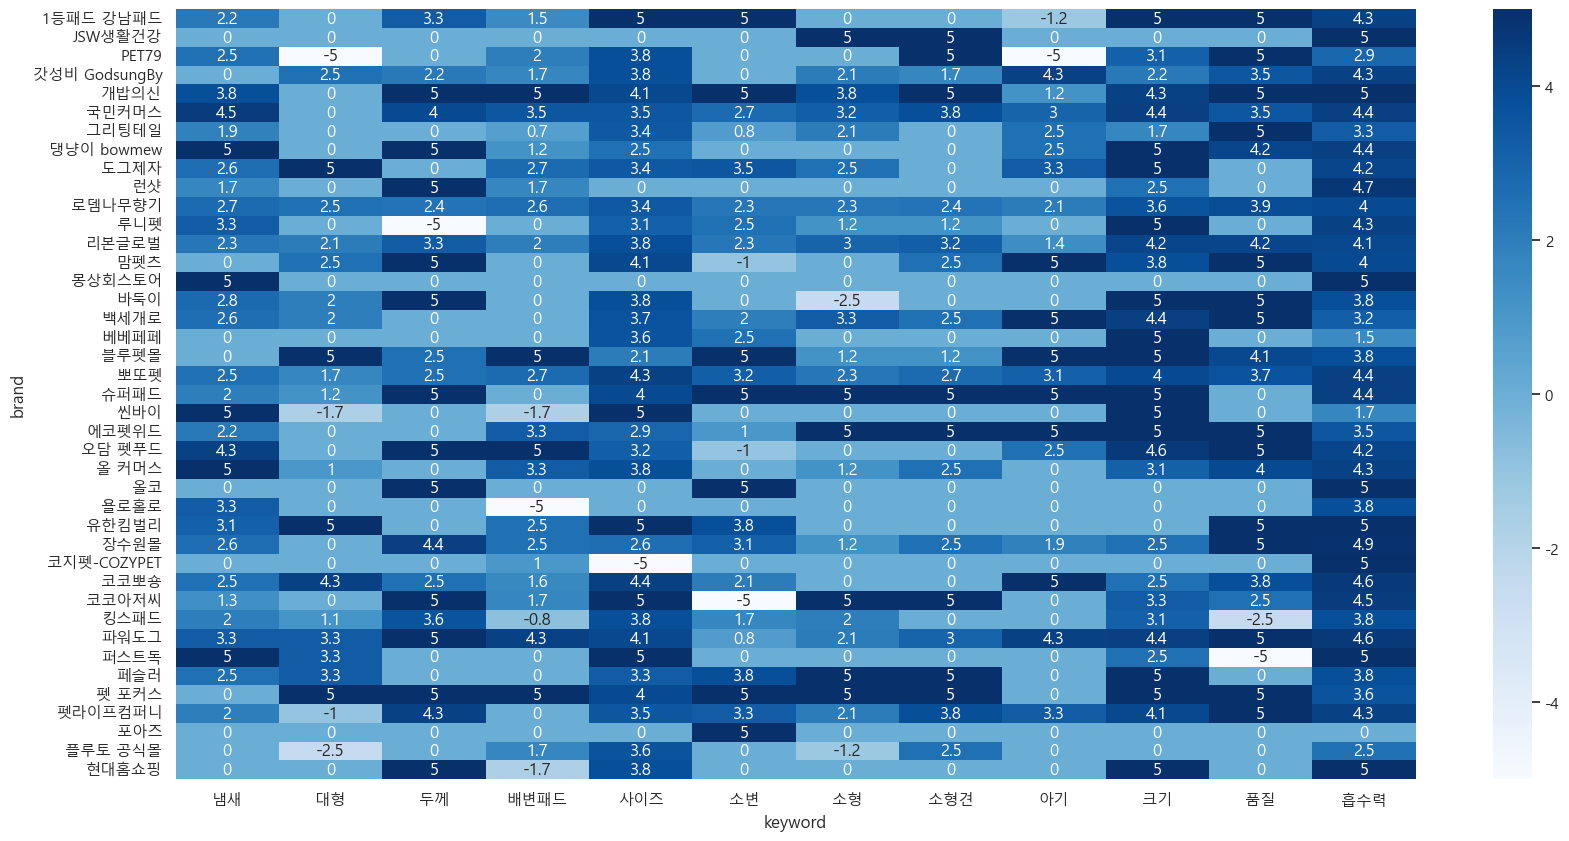

In [55]:
# 전체 결과 예시 
brand_impact_topic(list_brand_topic_score(filtered_df, 
                       topic_lst=topic_lst,
                       brands=brands_unique,
                       k=1
                       )[1],
                       is_annot=True,
                       fig_size_input = (20,10)
                       )

<Axes: xlabel='keyword', ylabel='brand'>

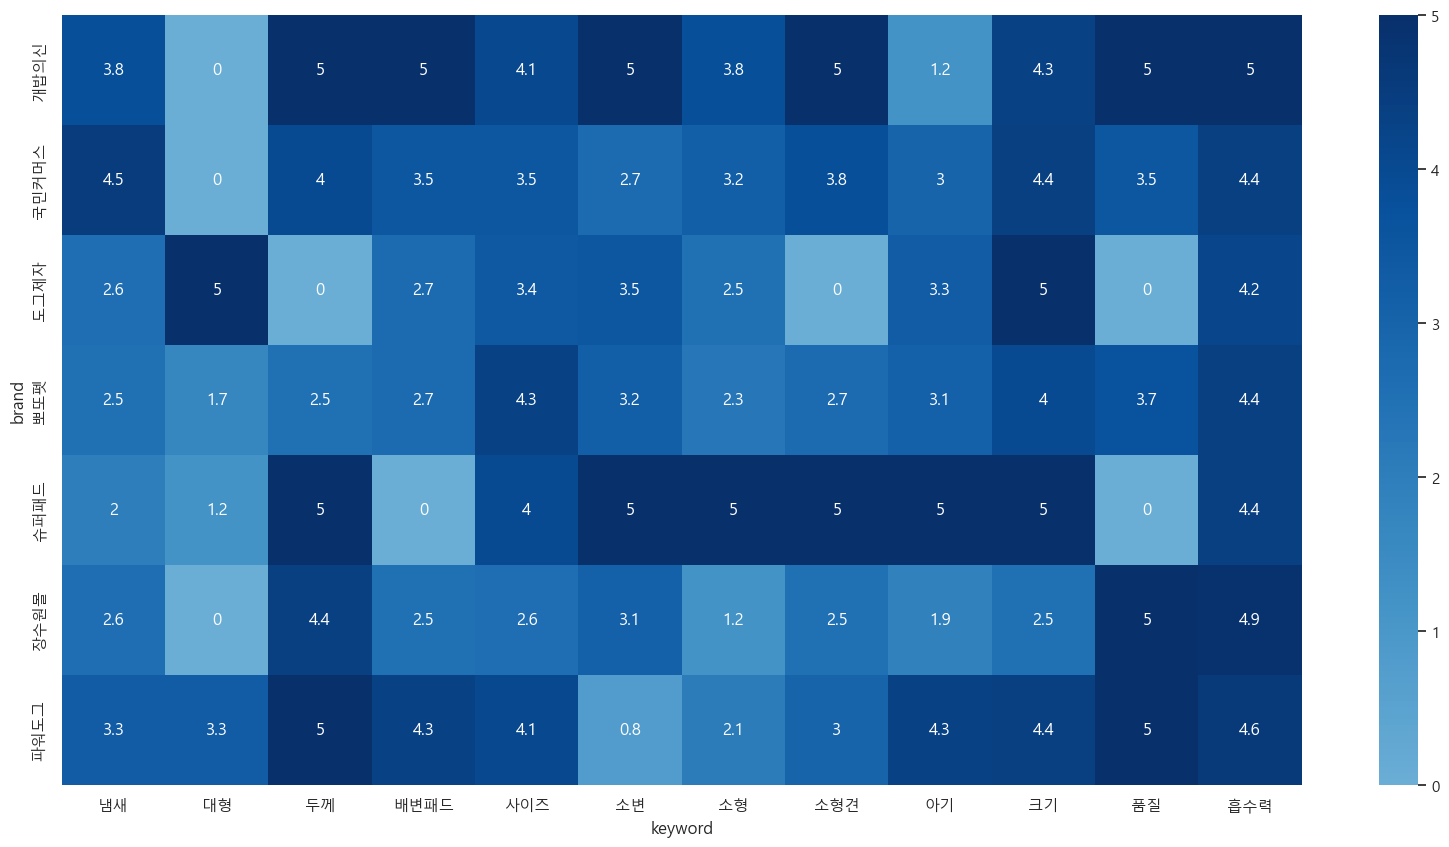

In [56]:
# 부분 결과 예시 
brand_impact_topic(list_brand_topic_score(filtered_df, 
                       topic_lst=topic_lst,
                       brands=['개밥의신','국민커머스','도그제자','슈퍼패드','파워도그','뽀또펫','장수원몰'],
                       k=1
                       )[1],
                       is_annot=True,
                       fig_size_input = (20,10)
                       )

In [45]:
"""
# 전체 대상 결과 
brand_impact_topic(list_brand_topic_score(filtered_df, 
                       topic_lst=['충전','케이스','디자인','포트','콘센트','파우치','타입','고속충전','멀티탭','충전기','C타입'],
                       brands=brands_unique,
                       k=1
                       )[1],
                       is_annot=True
                       )
"""

"\n# 전체 대상 결과 \nbrand_impact_topic(list_brand_topic_score(filtered_df, \n                       topic_lst=['충전','케이스','디자인','포트','콘센트','파우치','타입','고속충전','멀티탭','충전기','C타입'],\n                       brands=brands_unique,\n                       k=1\n                       )[1],\n                       is_annot=True\n                       )\n"

In [46]:
print(f'''
    어댑터의 sentiment 결과값은 아래와 같습니다.
    
    1. 브랜드들 통합 결과
    {list_brand_topic_score(filtered_df, 
                       topic_lst=topic_lst,
                       k=1
                       )[0]}
    
    2. 브랜드 개별 결과
    {list_brand_topic_score(filtered_df, 
                       topic_lst=topic_lst,
                       k=1
                       )[1]}       
        ''')


    어댑터의 sentiment 결과값은 아래와 같습니다.
    
    1. 브랜드들 통합 결과
                                                   brands keyword  \
0   리본글로벌, 장수원몰, 로뎀나무향기, 코코아저씨, 뽀또펫, 백세개로, 1등패드 강남...     사이즈   
1   리본글로벌, 장수원몰, 로뎀나무향기, 코코아저씨, 뽀또펫, 백세개로, 1등패드 강남...     흡수력   
2   리본글로벌, 장수원몰, 로뎀나무향기, 코코아저씨, 뽀또펫, 백세개로, 1등패드 강남...      소변   
3   리본글로벌, 장수원몰, 로뎀나무향기, 코코아저씨, 뽀또펫, 백세개로, 1등패드 강남...      크기   
4   리본글로벌, 장수원몰, 로뎀나무향기, 코코아저씨, 뽀또펫, 백세개로, 1등패드 강남...      품질   
5   리본글로벌, 장수원몰, 로뎀나무향기, 코코아저씨, 뽀또펫, 백세개로, 1등패드 강남...      냄새   
6   리본글로벌, 장수원몰, 로뎀나무향기, 코코아저씨, 뽀또펫, 백세개로, 1등패드 강남...     소형견   
7   리본글로벌, 장수원몰, 로뎀나무향기, 코코아저씨, 뽀또펫, 백세개로, 1등패드 강남...    배변패드   
8   리본글로벌, 장수원몰, 로뎀나무향기, 코코아저씨, 뽀또펫, 백세개로, 1등패드 강남...      두께   
9   리본글로벌, 장수원몰, 로뎀나무향기, 코코아저씨, 뽀또펫, 백세개로, 1등패드 강남...      아기   
10  리본글로벌, 장수원몰, 로뎀나무향기, 코코아저씨, 뽀또펫, 백세개로, 1등패드 강남...      대형   
11  리본글로벌, 장수원몰, 로뎀나무향기, 코코아저씨, 뽀또펫, 백세개로, 1등패드 강남...      소형   

    sentiment_norm_score  
0                    3.7  
1                    4.1  
2          

In [47]:
list_brand_topic_score(filtered_df, 
                       topic_lst=topic_lst,
                       k=1
                       )[0]

,brands,keyword,sentiment_norm_score
0,"리본글로벌, 장수원몰, 로뎀나무향기, 코코아저씨, 뽀또펫, 백세개로, 1등패드 강남...",사이즈,3.7
1,"리본글로벌, 장수원몰, 로뎀나무향기, 코코아저씨, 뽀또펫, 백세개로, 1등패드 강남...",흡수력,4.1
2,"리본글로벌, 장수원몰, 로뎀나무향기, 코코아저씨, 뽀또펫, 백세개로, 1등패드 강남...",소변,2.2
3,"리본글로벌, 장수원몰, 로뎀나무향기, 코코아저씨, 뽀또펫, 백세개로, 1등패드 강남...",크기,4.0
4,"리본글로벌, 장수원몰, 로뎀나무향기, 코코아저씨, 뽀또펫, 백세개로, 1등패드 강남...",품질,4.2
5,"리본글로벌, 장수원몰, 로뎀나무향기, 코코아저씨, 뽀또펫, 백세개로, 1등패드 강남...",냄새,2.3
6,"리본글로벌, 장수원몰, 로뎀나무향기, 코코아저씨, 뽀또펫, 백세개로, 1등패드 강남...",소형견,3.1
7,"리본글로벌, 장수원몰, 로뎀나무향기, 코코아저씨, 뽀또펫, 백세개로, 1등패드 강남...",배변패드,1.9
8,"리본글로벌, 장수원몰, 로뎀나무향기, 코코아저씨, 뽀또펫, 백세개로, 1등패드 강남...",두께,3.2
9,"리본글로벌, 장수원몰, 로뎀나무향기, 코코아저씨, 뽀또펫, 백세개로, 1등패드 강남...",아기,1.8


In [48]:
list_brand_topic_score(filtered_df, 
                       topic_lst=topic_lst,
                       k=1
                       )[1]

,brand,keyword,sentiment_norm_score
0,리본글로벌,사이즈,3.8
1,장수원몰,사이즈,2.6
2,로뎀나무향기,사이즈,3.4
3,코코아저씨,사이즈,5.0
4,뽀또펫,사이즈,4.3
...,...,...,...
487,코지펫-COZYPET,소형,0.0
488,댕냥이 bowmew,소형,0.0
489,페슬러,소형,5.0
490,유한킴벌리,소형,0.0


### Test

<Axes: xlabel='keyword', ylabel='brand'>

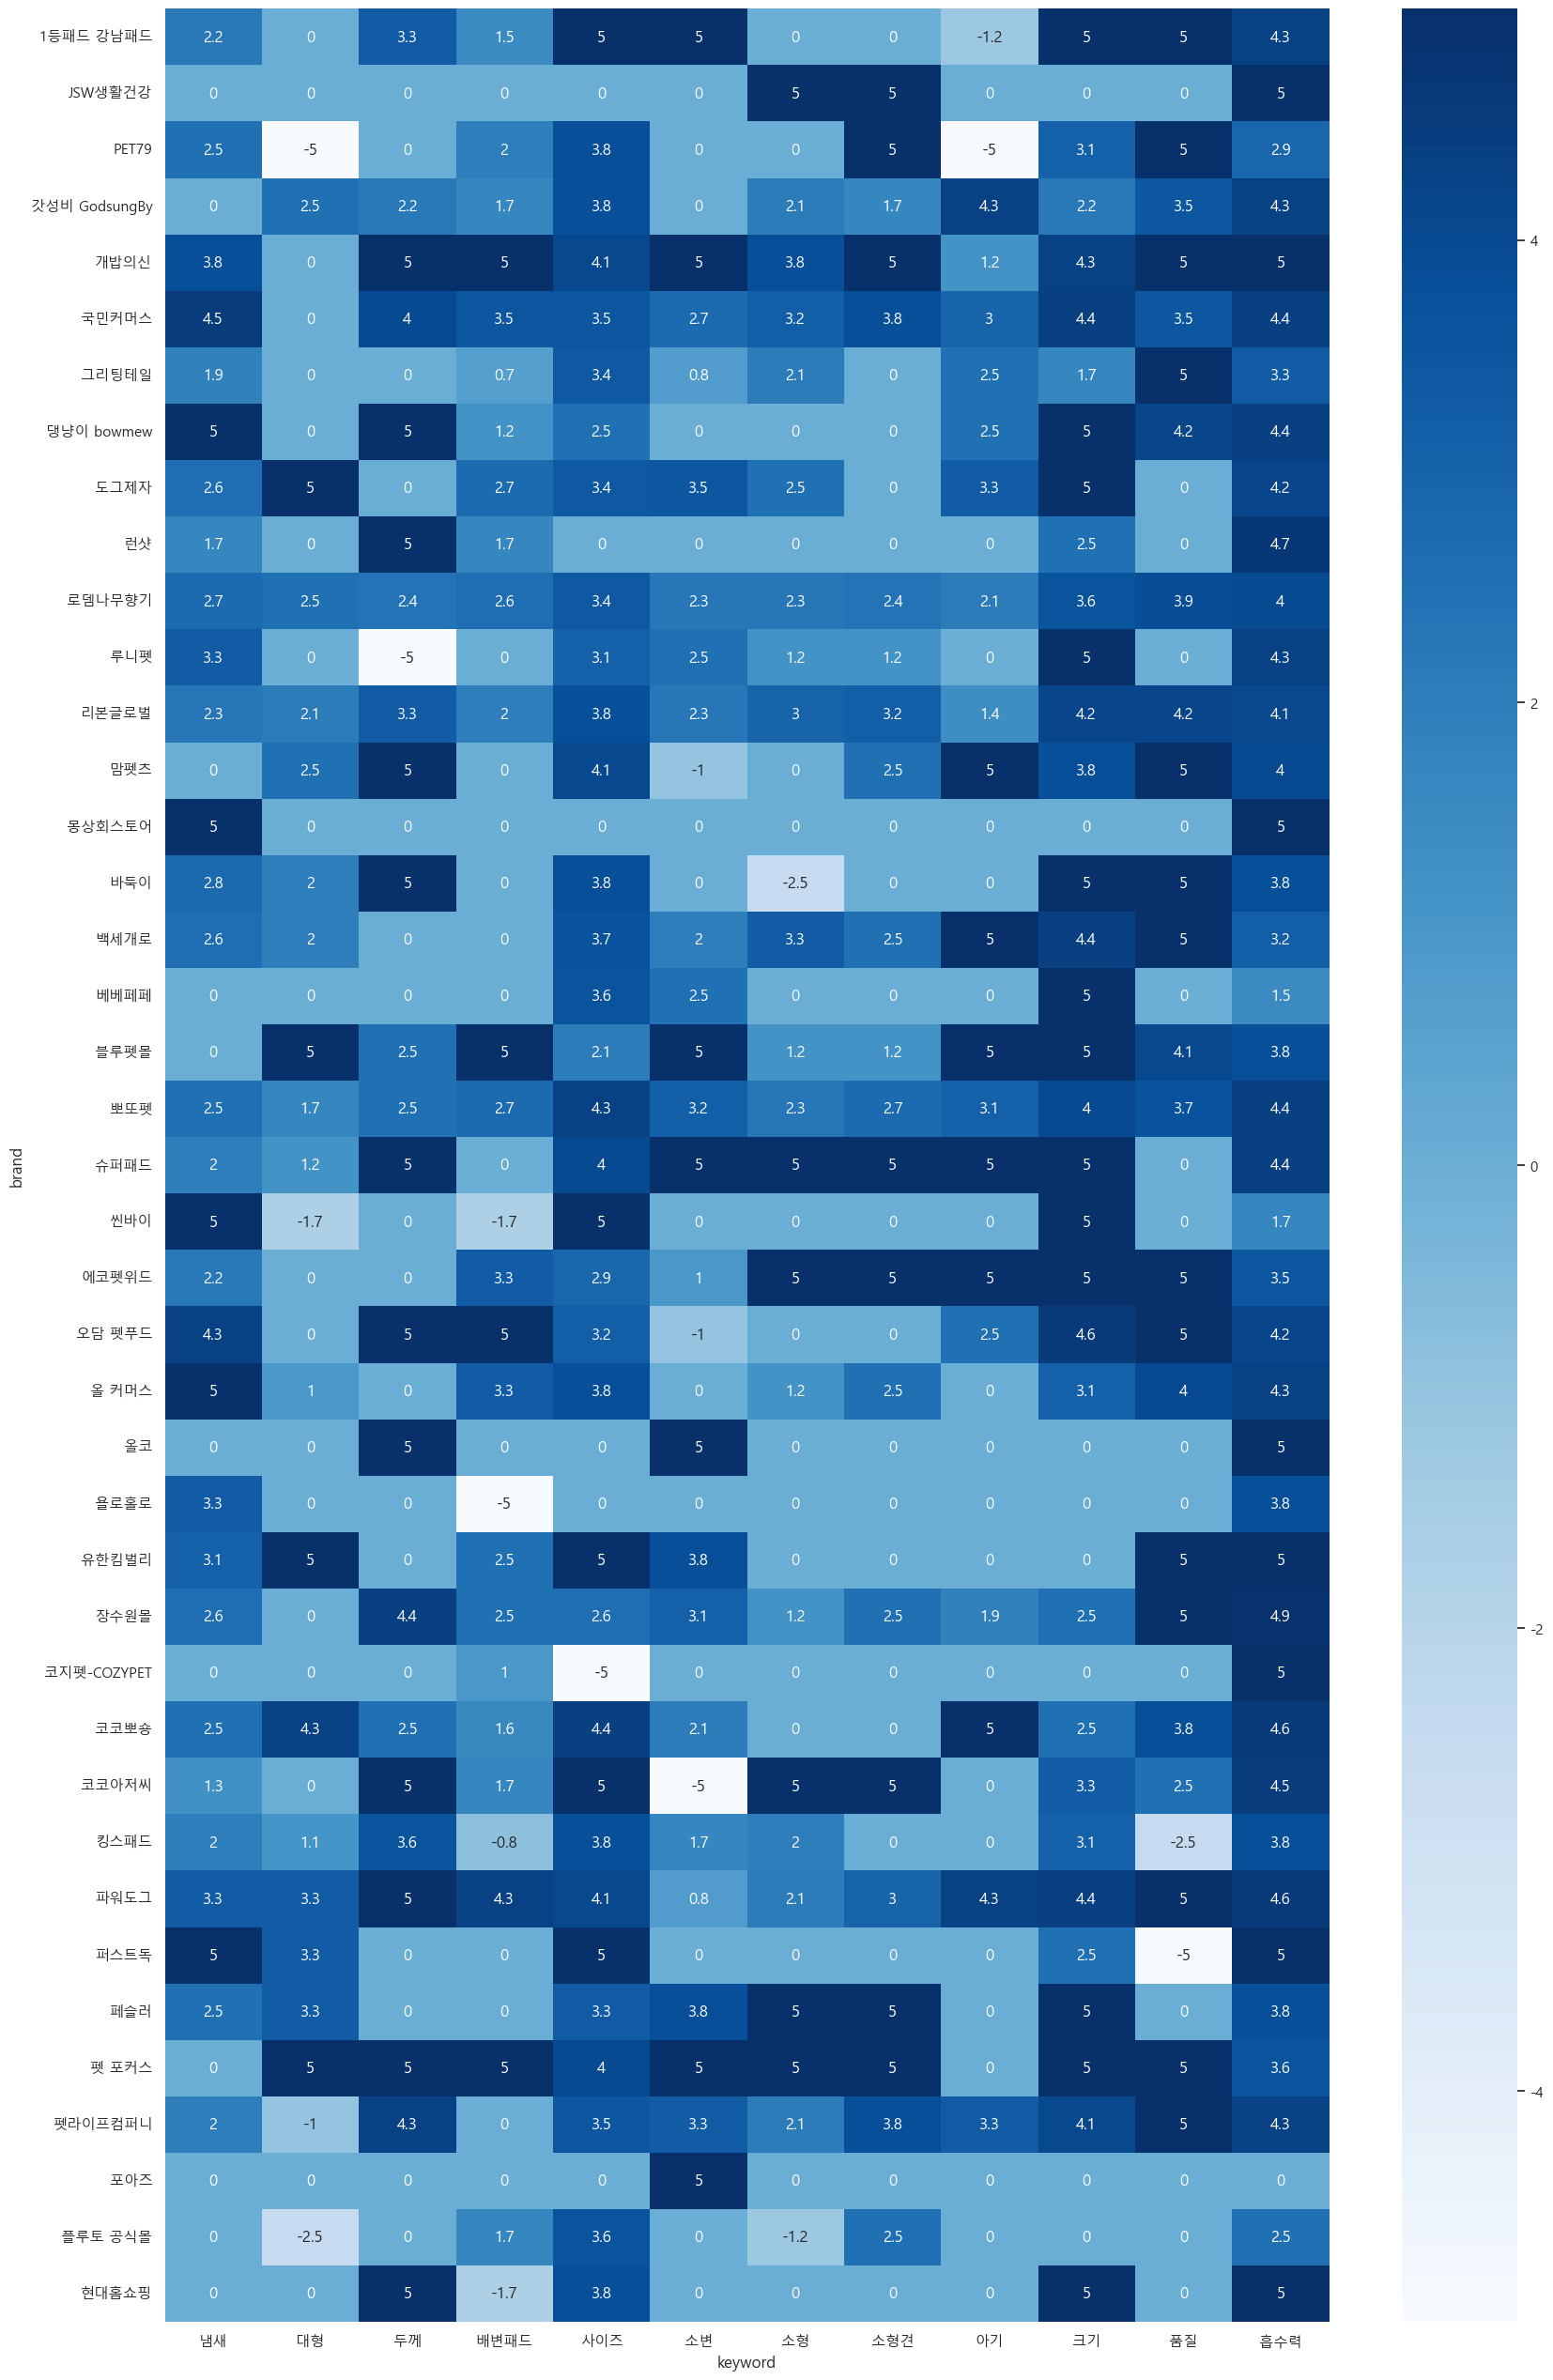

In [57]:
# 전체 대상 결과 
brand_impact_topic(list_brand_topic_score(filtered_df, 
                       topic_lst=topic_lst,
                       brands=brands_unique,
                       k=1
                       )[1],
                       is_annot=True
                       )

### 부가 확인

In [50]:
# NaN 여부 확인
general[general['tokenized_sentence'].isna()]

,brand_name,product_name,write_dt_lst,rating_lst,content_lst,len,repeated_final,review_type,tokenized_sentence,detail_review_type,morphs,Tokenized_morphs_list,match_dic,polarity,sentiment


In [51]:
general_2 = general.copy()

general_2['tokenized_sentence_len'] = general_2['tokenized_sentence'].apply(lambda x : len(x))
general_2[general_2['tokenized_sentence_len']==0]

,brand_name,product_name,write_dt_lst,rating_lst,content_lst,len,repeated_final,review_type,tokenized_sentence,detail_review_type,morphs,Tokenized_morphs_list,match_dic,polarity,sentiment,tokenized_sentence_len
